In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

## Reading Data

In [124]:
# Read Seattle Collison Data, .csv file
df = pd.read_csv("Collisions.csv")

## Data Visualization

### Collision Locations

In [9]:
# Location of 7000 collisions on the map
map = folium.Map(location=[47.5173613008169, -122.356510805749], zoom_start=10)
map_cluster = MarkerCluster().add_to(map)
location = df[['Y', 'X']][df['X'].notnull()][:7000]
loc = location.values.tolist()
for i in range(len(loc)):
  folium.Marker(loc[i]).add_to(map_cluster)
map

## Collision Rate

### Year

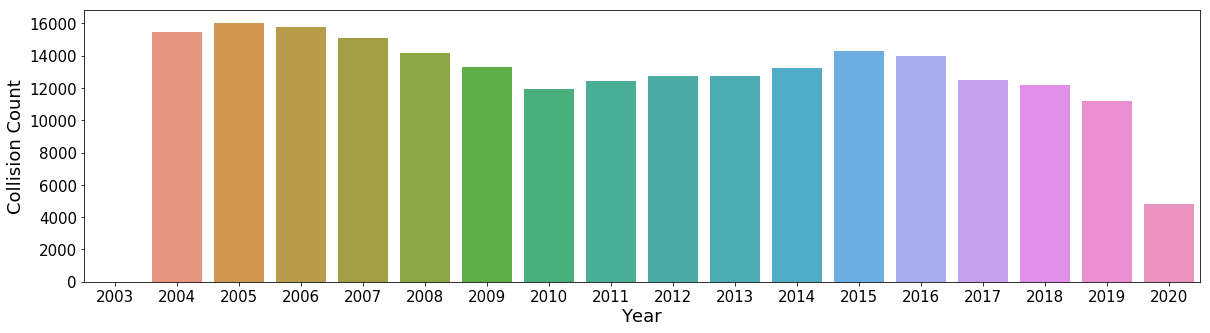

In [125]:
# Collision count in each Year
df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["INCDATE"].dt.year, ax=ax)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

### Month

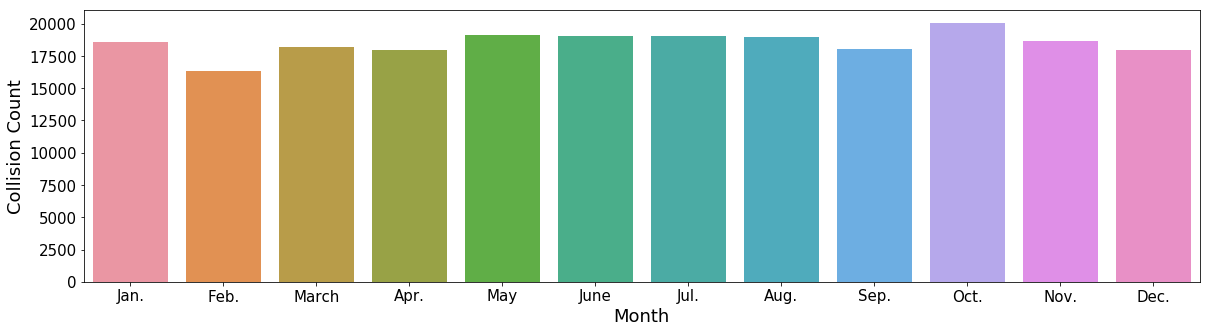

In [126]:
# Collision count in each Month
df['INCDATE'] = pd.to_datetime(df['INCDATE'], errors='coerce')
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["INCDATE"].dt.month, ax=ax)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(['Jan.', 'Feb.','March', 'Apr.', 'May', 'June', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

### Days

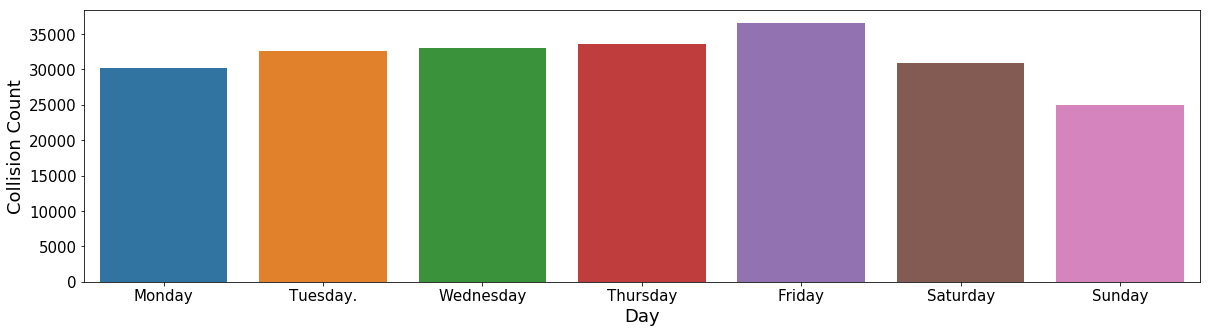

In [127]:
# Collision count in each weekday
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["INCDTTM"].dt.weekday, ax=ax)
ax.set_xlabel('Day', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(['Monday', 'Tuesday.','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

### Time

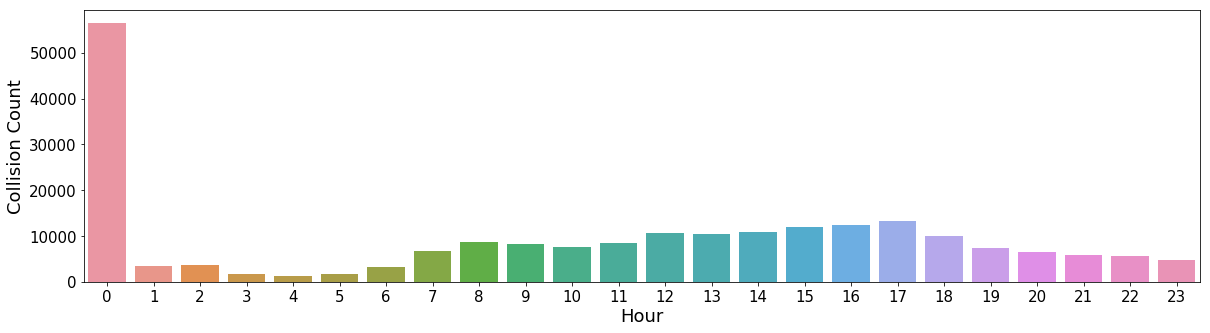

In [128]:
# Collision count in each hour
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'], errors='coerce')
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["INCDTTM"].dt.hour, ax=ax)
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
#ax.set_xticklabels(['Jan.', 'Feb.','March', 'Apr.', 'May', 'June', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

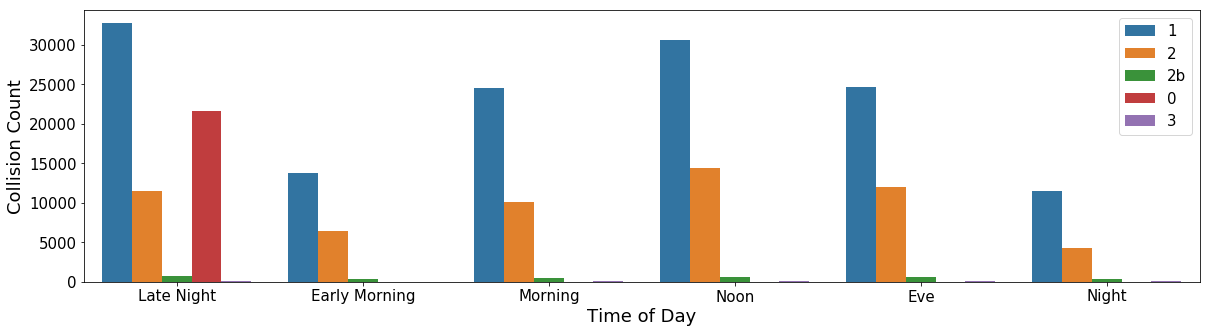

In [129]:
# Collision count in in different daytimes
df["INCTIME"] = pd.to_datetime(df["INCDTTM"])
intervals = [0,4,8,12,16,20,24]
labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df["TIMEOFDAY"] = pd.cut(df["INCTIME"].dt.hour, bins=intervals, labels=labels, include_lowest=True)
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["TIMEOFDAY"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Time of Day', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Weather Conditions

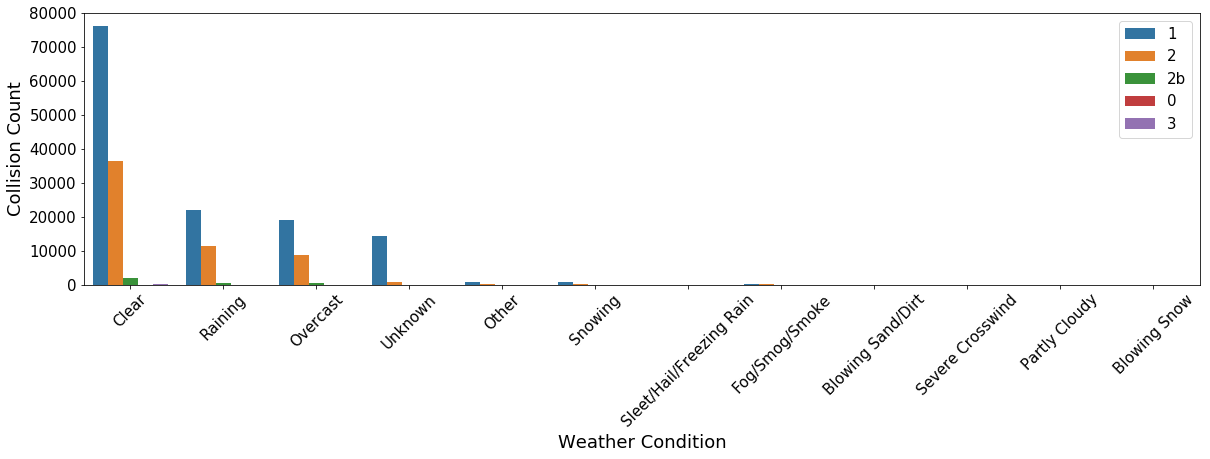

In [130]:
# Collision count under different weather conditions
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["WEATHER"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Weather Condition', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Road Conditions

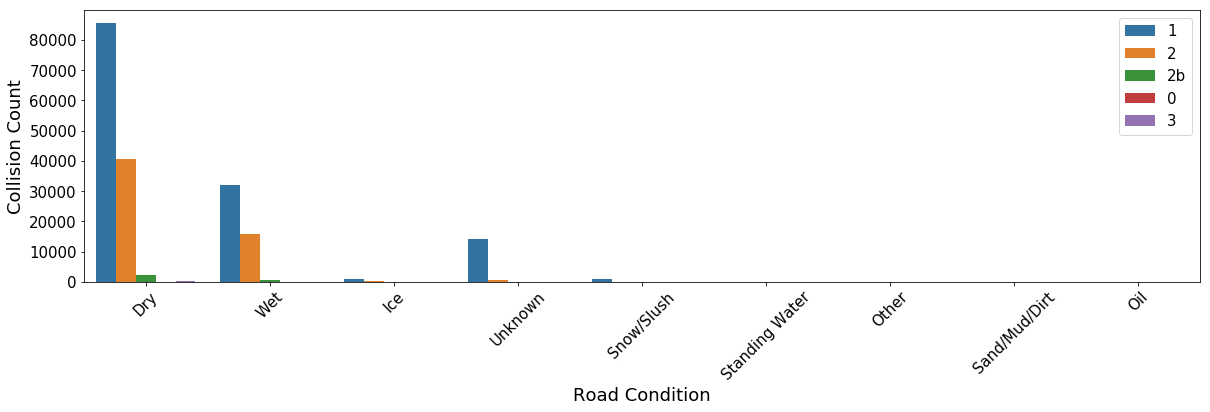

In [131]:
# Collision count under different road conditions
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["ROADCOND"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Road Condition', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Light Conditions

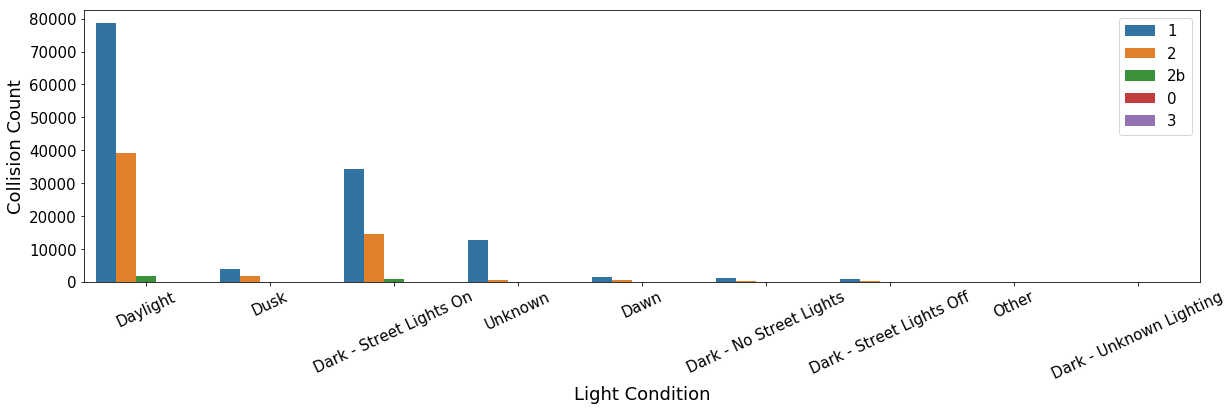

In [132]:
# Collision count under different light conditions
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["LIGHTCOND"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Light Condition', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Address Types

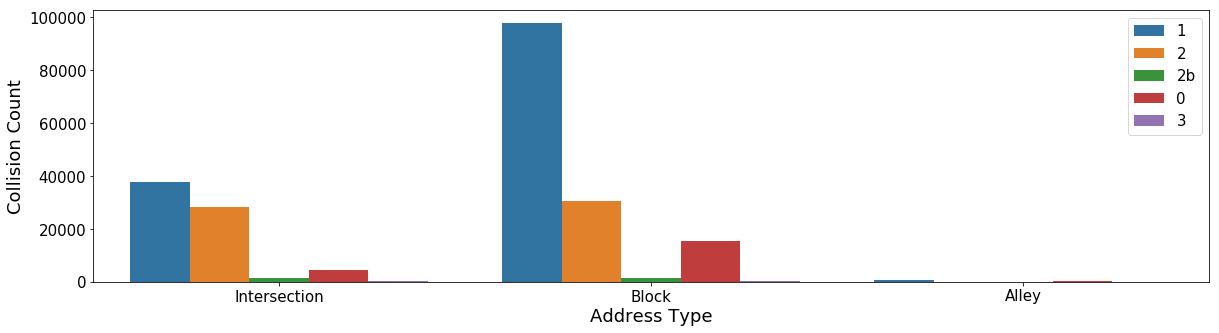

In [133]:
# Collision count for different address types
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["ADDRTYPE"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Address Type', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Junction Types

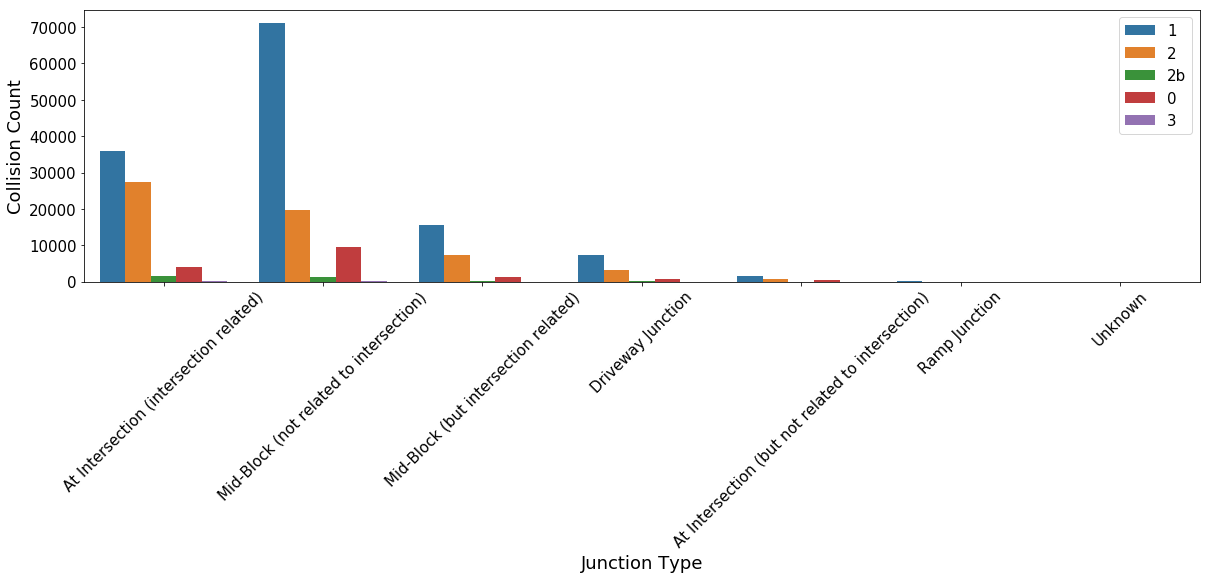

In [134]:
# Collision count for different junction types
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["JUNCTIONTYPE"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Junction Type', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Collision Types

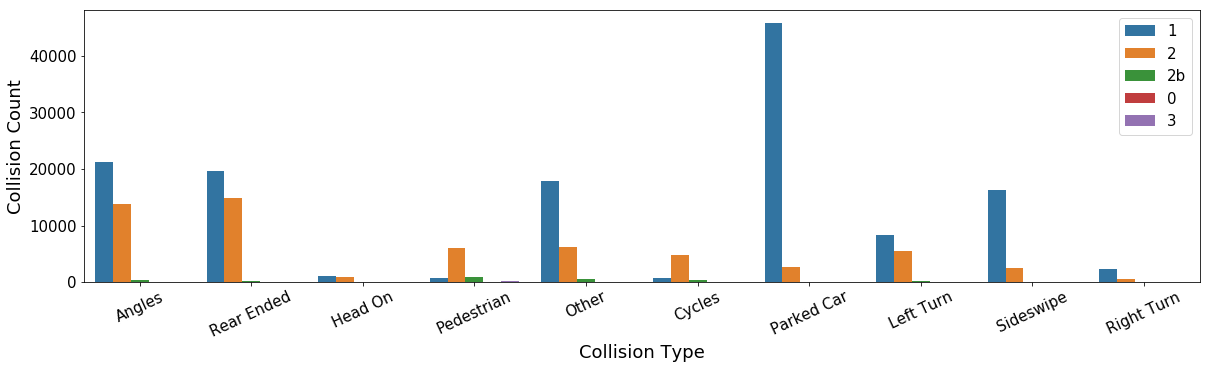

In [135]:
# Collision count for different collision types
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["COLLISIONTYPE"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Collision Type', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Speeding

C:\Users\Jerry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'')

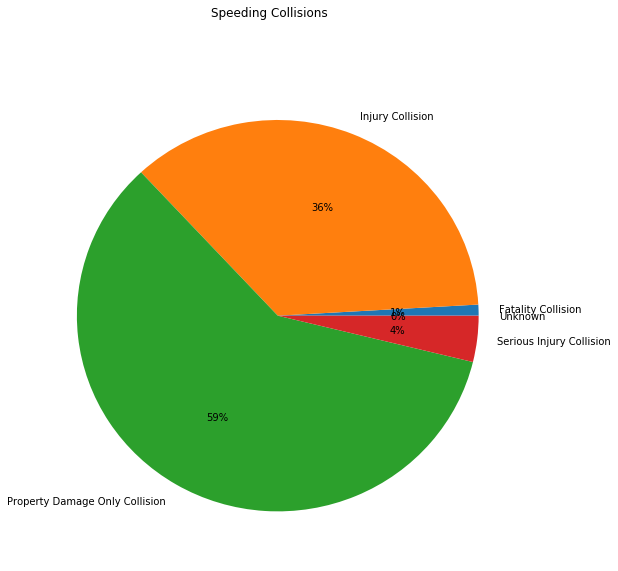

In [136]:
# Severity type when there is speeding
((df[df["SPEEDING"]=="Y"].groupby("SEVERITYDESC")["OBJECTID"].count()/ df[df["SPEEDING"]=="Y"].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(y='Collision Percentage', subplots=True,figsize=(9,9), autopct='%1.0f%%' , title="Speeding Collisions")
plt.axes().set_ylabel('')

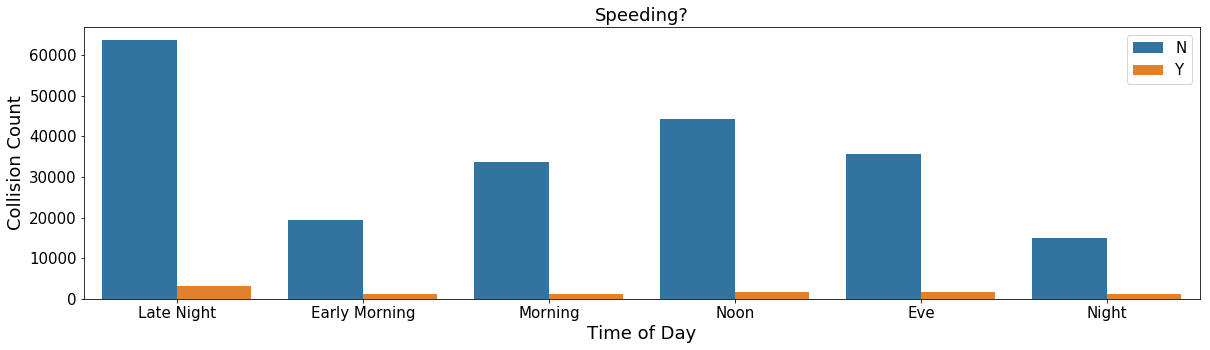

In [137]:
# Speeding in different daytimes
fig, ax = plt.subplots(figsize=(20,5))
df.replace({'SPEEDING' : {np.nan: 'N'}}, inplace=True)
sns.countplot(df["TIMEOFDAY"], hue=df['SPEEDING'], ax=ax)
ax.set_xlabel('Time of Day', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_title("Speeding?", fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Influence under Drugs or Alcohole

C:\Users\Jerry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'')

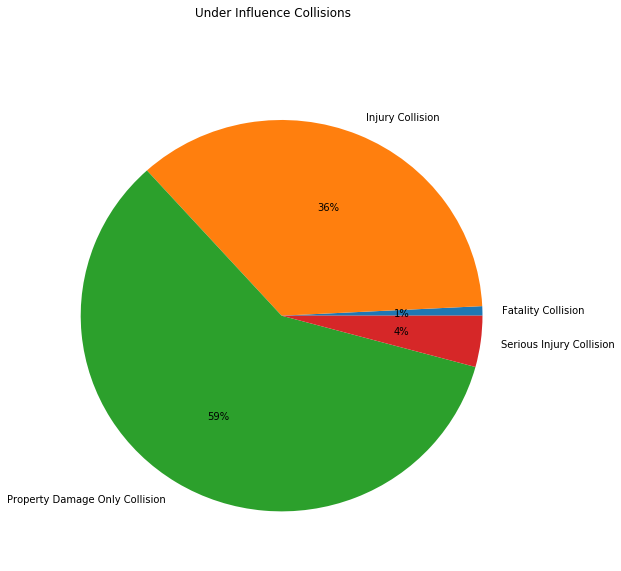

In [138]:
# Severity type when the driver is under influence of drugs or alcohole
df['UNDERINFL'].replace(to_replace={ 1:'Y', 0:'N'}, inplace=True)
((df[df["UNDERINFL"]=="Y"].groupby("SEVERITYDESC")["OBJECTID"].count()/ df[df["UNDERINFL"]=="Y"].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(y='Collision Percentage', subplots=True,figsize=(9,9), autopct='%1.0f%%' , title="Under Influence Collisions")
plt.axes().set_ylabel('')

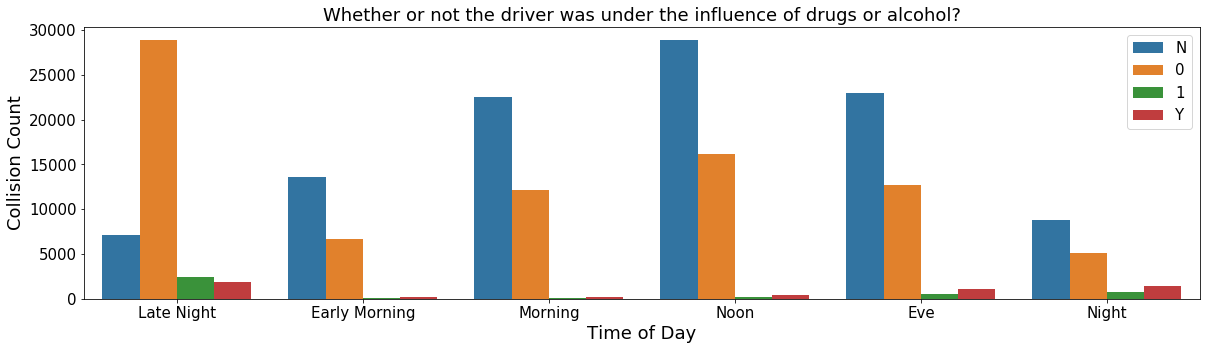

In [139]:
# distribution of under influence drivers over day hours
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["TIMEOFDAY"], hue=df['UNDERINFL'], ax=ax)
ax.set_xlabel('Time of Day', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_title("Whether or not the driver was under the influence of drugs or alcohol?", fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Inattention

C:\Users\Jerry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'')

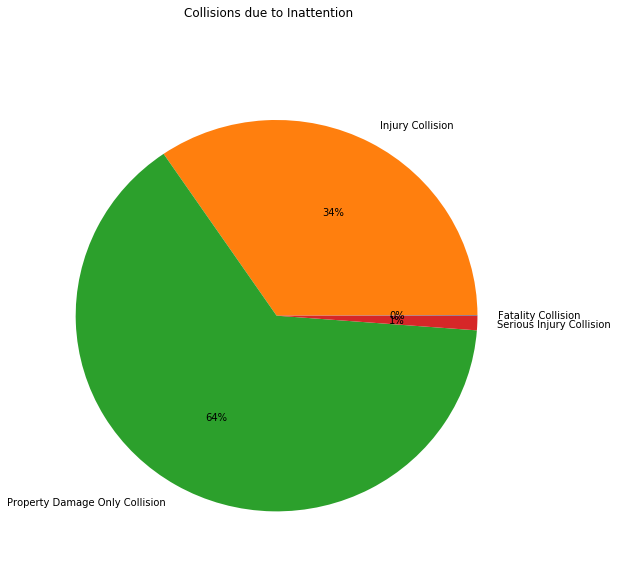

In [140]:
# Severity type when there is an inattention
((df[df["INATTENTIONIND"]=="Y"].groupby("SEVERITYDESC")["OBJECTID"].count()/ df[df["INATTENTIONIND"]=="Y"].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(y='Collision Percentage', subplots=True,figsize=(9,9), autopct='%1.0f%%' , title="Collisions due to Inattention")
plt.axes().set_ylabel('')

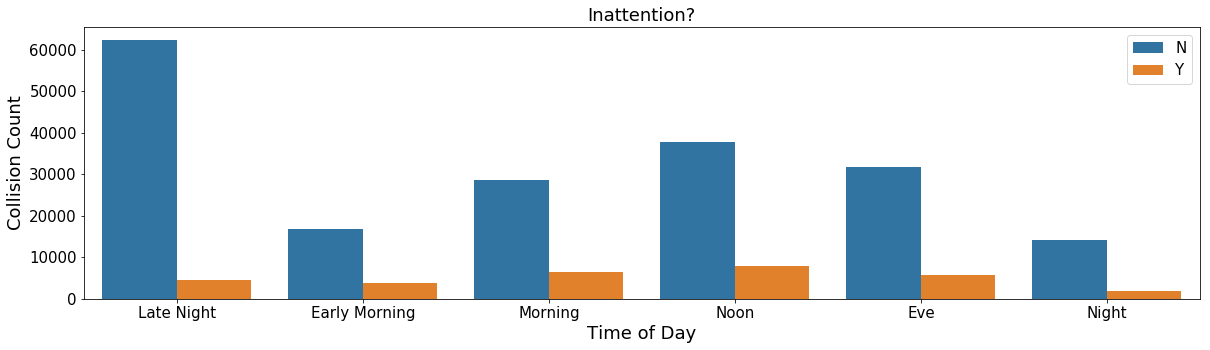

In [141]:
# distribution of inattention over day hours
df.replace({'INATTENTIONIND' : {np.nan: 'N'}}, inplace=True)
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["TIMEOFDAY"], hue=df['INATTENTIONIND'], ax=ax)
ax.set_xlabel('Time of Day', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.set_title("Inattention?", fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Hitted Parked Cars

C:\Users\Jerry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'')

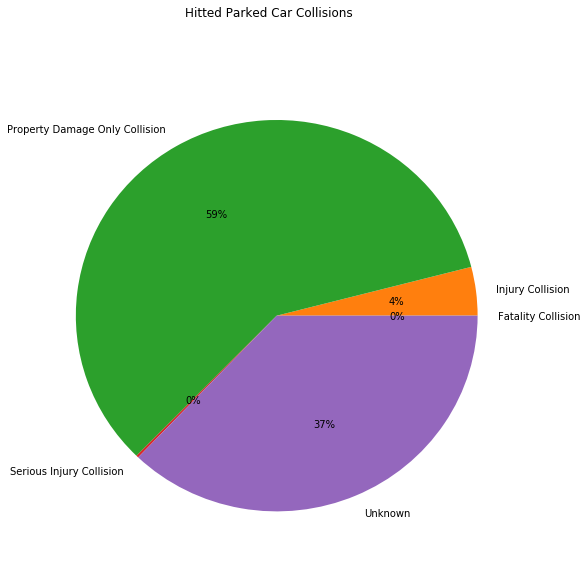

In [142]:
# Severity type when hitting a parked car is involved
((df[df["HITPARKEDCAR"]=="Y"].groupby("SEVERITYDESC")["OBJECTID"].count()/ df[df["HITPARKEDCAR"]=="Y"].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(y='Collision Percentage', subplots=True,figsize=(9,9), autopct='%1.0f%%' , title="Hitted Parked Car Collisions")
plt.axes().set_ylabel('')

### Pedestrians Involved Collisions

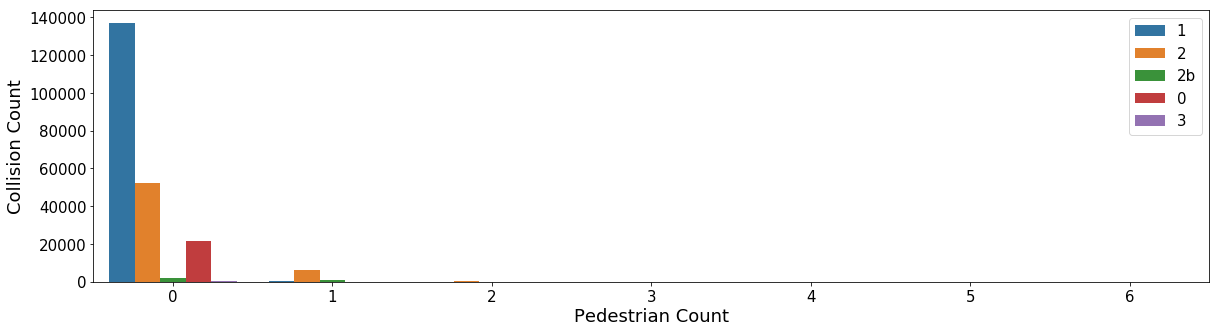

In [143]:
# Collision count with different number of involved pedestrians
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["PEDCOUNT"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Pedestrian Count', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Bicycles Involved Collisions

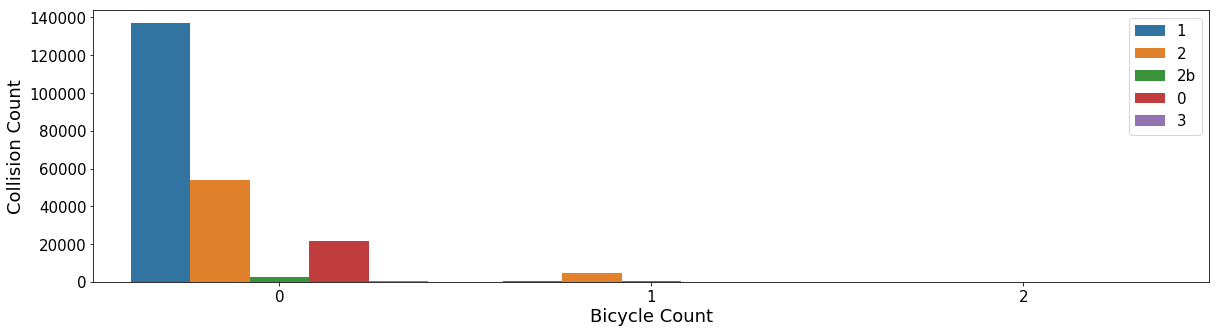

In [144]:
# Collision count with different number of involved bicycles
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["PEDCYLCOUNT"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Bicycle Count', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Vehicles Involved Collisions

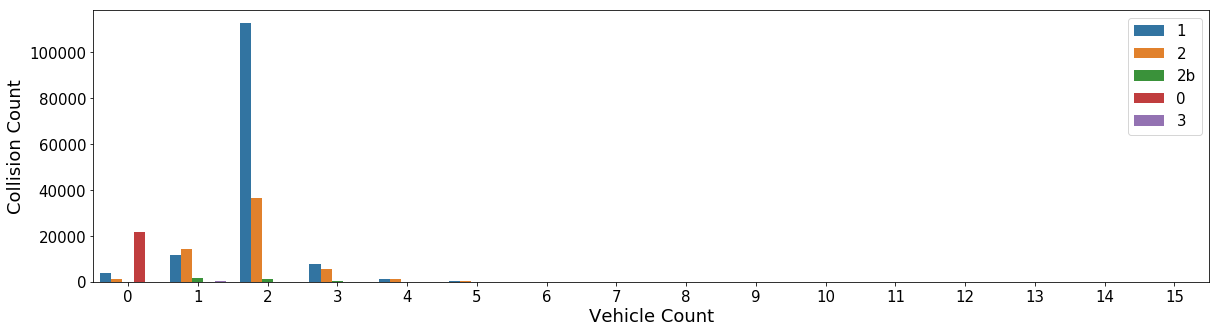

In [145]:
# Collision count with different number of involved vehicles
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["VEHCOUNT"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Vehicle Count', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

### Injuries

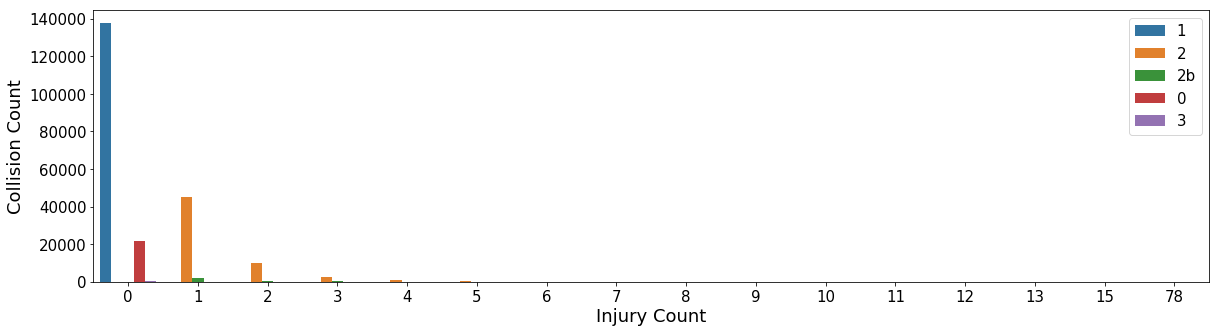

In [146]:
# Collision count with different number of injuries
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["INJURIES"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Injury Count', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

C:\Users\Jerry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'')

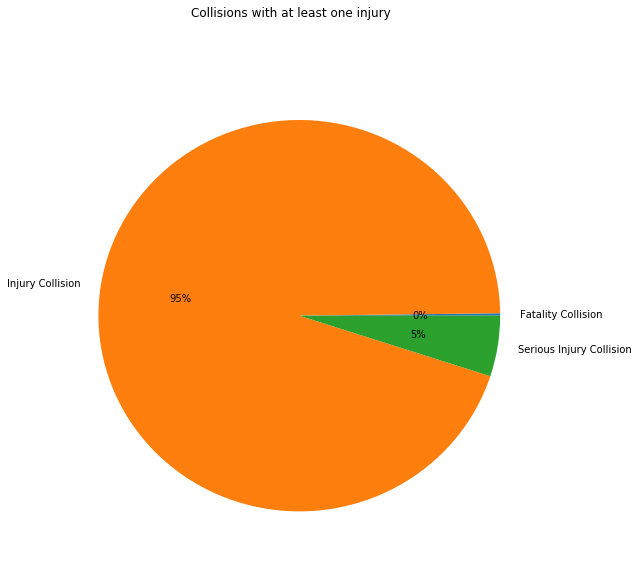

In [147]:
# Collision severity when there is at least one injury
((df[df["INJURIES"]>0].groupby("SEVERITYDESC")["OBJECTID"].count()/ df[df["INJURIES"]>0].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(y='Collision Percentage', subplots=True,figsize=(9,9), autopct='%1.0f%%' , title="Collisions with at least one injury")
plt.axes().set_ylabel('')

### Serious Injuries

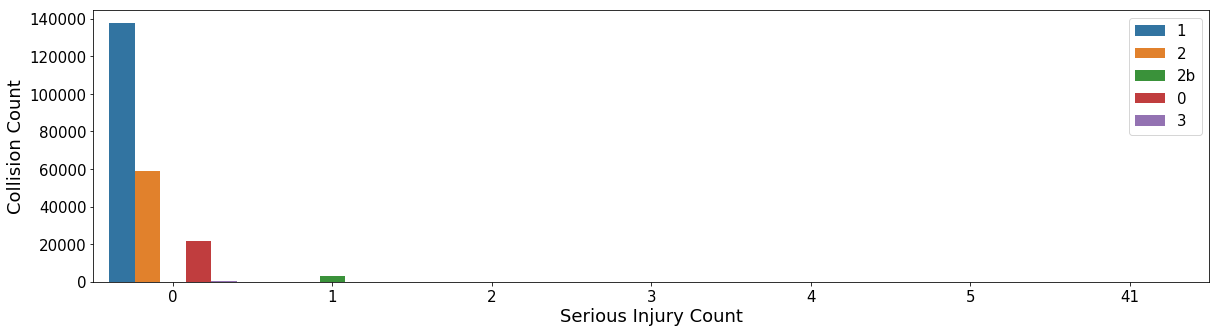

In [148]:
# Collision count with different number of serious injuries
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["SERIOUSINJURIES"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Serious Injury Count', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})

C:\Users\Jerry\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'')

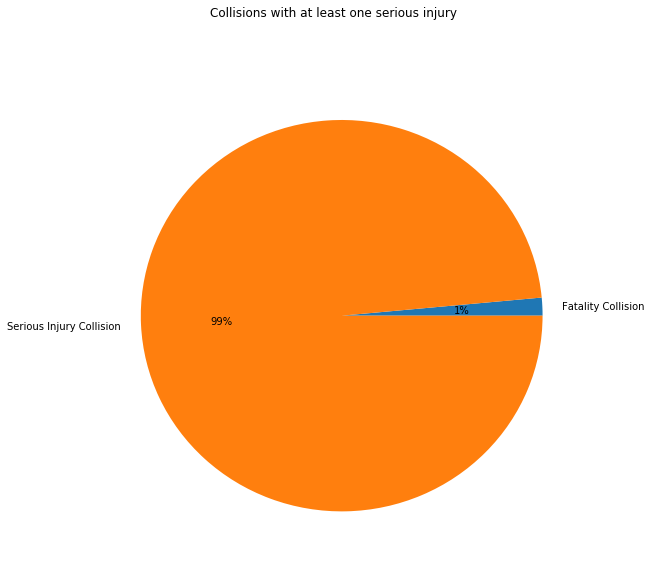

In [149]:
# Collision severity when there is at least one serious injury
((df[df["SERIOUSINJURIES"]>0].groupby("SEVERITYDESC")["OBJECTID"].count()/ df[df["SERIOUSINJURIES"]>0].groupby("SEVERITYCODE")["OBJECTID"].count().sum())*100).plot.pie(y='Collision Percentage', subplots=True,figsize=(9,9), autopct='%1.0f%%' , title="Collisions with at least one serious injury")
plt.axes().set_ylabel('')

### Fatalities

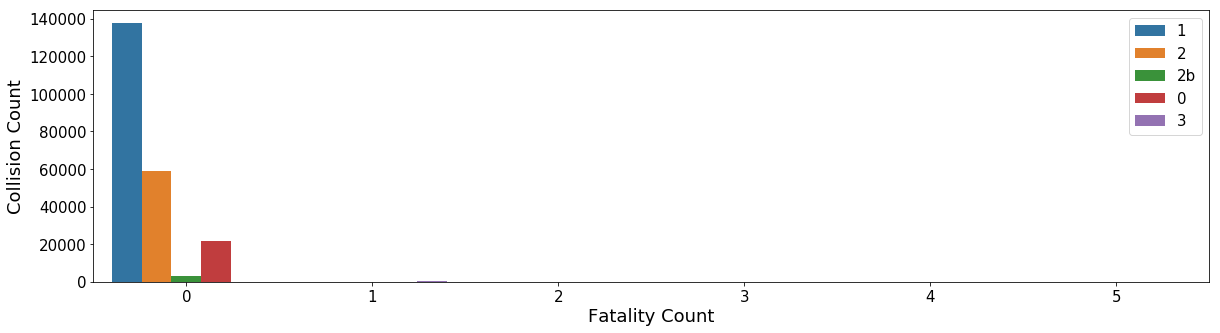

In [150]:
# Collision count with different number of fatalities
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df["FATALITIES"], hue=df['SEVERITYCODE'], ax=ax)
ax.set_xlabel('Fatality Count', fontsize=18)
ax.set_ylabel('Collision Count', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.legend(loc='upper right', prop={'size': 15})